<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Create-and-visualize-data" data-toc-modified-id="Create-and-visualize-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create and visualize data</a></span></li><li><span><a href="#OLS---Ordinary-Least-Squares-Regression" data-toc-modified-id="OLS---Ordinary-Least-Squares-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>OLS - Ordinary Least Squares Regression</a></span></li><li><span><a href="#PCA---Principal-Component-Analysis" data-toc-modified-id="PCA---Principal-Component-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PCA - Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#An-Aside" data-toc-modified-id="An-Aside-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>An Aside</a></span></li></ul></li><li><span><a href="#PCR---Principal-Component-Regression" data-toc-modified-id="PCR---Principal-Component-Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>PCR - Principal Component Regression</a></span></li><li><span><a href="#PLS---Projection-to-Latent-Structures" data-toc-modified-id="PLS---Projection-to-Latent-Structures-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>PLS - Projection to Latent Structures</a></span></li><li><span><a href="#Ridge-&amp;-Lasso" data-toc-modified-id="Ridge-&amp;-Lasso-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ridge &amp; Lasso</a></span></li><li><span><a href="#LDA---Linear-Discriminant-Analysis" data-toc-modified-id="LDA---Linear-Discriminant-Analysis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>LDA - Linear Discriminant Analysis</a></span><ul class="toc-item"><li><span><a href="#Manually-Computing-LDA-Probability" data-toc-modified-id="Manually-Computing-LDA-Probability-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Manually Computing LDA Probability</a></span></li><li><span><a href="#LDA-+-Logistic-Regression" data-toc-modified-id="LDA-+-Logistic-Regression-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>LDA + Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Illustration" data-toc-modified-id="Illustration-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Illustration</a></span></li><li><span><a href="#As-a-pipeline" data-toc-modified-id="As-a-pipeline-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>As a pipeline</a></span></li></ul></li></ul></li><li><span><a href="#PLS-DA---PLS-Discriminant-Analysis" data-toc-modified-id="PLS-DA---PLS-Discriminant-Analysis-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>PLS-DA - PLS Discriminant Analysis</a></span><ul class="toc-item"><li><span><a href="#Hard-vs.-Soft-PLS-DA" data-toc-modified-id="Hard-vs.-Soft-PLS-DA-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Hard vs. Soft PLS-DA</a></span><ul class="toc-item"><li><span><a href="#Hard-PLS-DA" data-toc-modified-id="Hard-PLS-DA-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>Hard PLS-DA</a></span></li><li><span><a href="#Soft-PLS-DA" data-toc-modified-id="Soft-PLS-DA-9.1.2"><span class="toc-item-num">9.1.2&nbsp;&nbsp;</span>Soft PLS-DA</a></span></li><li><span><a href="#Figures-of-Merit-for-Hard-and-Soft-PLS-DA" data-toc-modified-id="Figures-of-Merit-for-Hard-and-Soft-PLS-DA-9.1.3"><span class="toc-item-num">9.1.3&nbsp;&nbsp;</span>Figures of Merit for Hard and Soft PLS-DA</a></span></li></ul></li></ul></li><li><span><a href="#SIMCA" data-toc-modified-id="SIMCA-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>SIMCA</a></span><ul class="toc-item"><li><span><a href="#DD-SIMCA" data-toc-modified-id="DD-SIMCA-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>DD-SIMCA</a></span></li><li><span><a href="#LDA-+-SIMCA" data-toc-modified-id="LDA-+-SIMCA-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>LDA + SIMCA</a></span></li></ul></li><li><span><a href="#Notes" data-toc-modified-id="Notes-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Notes</a></span></li></ul></div>

In [1]:
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from IPython.display import Image

In [3]:
%load_ext watermark
%watermark -t -m -h -v --iversions

scipy      1.4.1
json       2.0.9
matplotlib 3.2.1
numpy      1.17.2
15:37:42 

CPython 3.7.4
IPython 7.8.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-159-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
host name  : ski-lab


In [4]:
# Based on https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html?highlight=pls

In [5]:
# These are almost all subspace methods. (OLS and Ridge are not)

# Functions

In [3]:
# Create a randomized 2D dataset that is already centered
def generate_data(n_samples=500, cov = [[3, 3], [3, 4]], seed=0, mean=[0, 0]):
    rng = np.random.RandomState(seed)
    X = rng.multivariate_normal(mean=mean, cov=cov, size=n_samples)
    
    return X

def generate_response(X, dimension, mean=[0,0], seed=1, y_center=0):
    X_pca = copy.copy(X) - np.array(mean) # Do mean shift according to what was specified
    
    # Generate dummy response on a chosen PC
    pca = PCA(n_components=2).fit(X_pca)
    rng = np.random.RandomState(seed)
    y = X_pca.dot(pca.components_[dimension]) + mean[dimension] + rng.normal(size=X.shape[0]) / 2 + y_center

    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    cmap = plt.get_cmap('viridis')
    rgba = cmap((y-np.min(y))/(np.max(y)-np.min(y)))

#     axes[0].scatter(X_pca.dot(pca.components_[0])+mean[0], y, c=rgba)
    axes[0].scatter(pca.transform(X_pca)[:,0]+mean[0], y, c=rgba)
    
    axes[0].set(xlabel='Projected data onto first PCA component', ylabel='y')
#     axes[1].scatter(X_pca.dot(pca.components_[1])+mean[1], y, c=rgba)
    axes[1].scatter(pca.transform(X_pca)[:,1]+mean[1], y, c=rgba)
    
    axes[1].set(xlabel='Projected data onto second PCA component', ylabel='y')
    axes[2].scatter(X[:, 0], X[:, 1], c=rgba, alpha=0.3)
    axes[2].set_xlabel('Feature 1')
    axes[2].set_ylabel('Feature 2')
    
    axes[int(dimension)].set_title('Strong correlation')
    axes[int(not dimension)].set_title('No correlation')
    plt.tight_layout()
    
    return y, pca

def visualize_data(X, mean=[0,0]):
    X_pca = copy.copy(X) - np.array(mean) # Do mean shift only for visualization purposes
    pca = PCA(n_components=2).fit(X_pca)
    
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,10))
    axes[0].scatter(X[:, 0], X[:, 1], alpha=.3, label='Samples')
    for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
        comp = comp * var  # scale component by its variance explanation power
        axes[0].plot([mean[0], comp[0]+mean[0]], [mean[1], comp[1]+mean[1]], label=f"Component {i}", linewidth=3,
                 color=f"C{i + 2}")
    axes[0].set(aspect='equal', xlabel='Feature 1', ylabel='Feature 2')
    _ = axes[0].legend()

    # Since we have unit eigenvectors, we can easily project
    axes[1].scatter(X[:, 0], X[:, 1], alpha=.3, label='Raw Data')
    projection_0 = np.dot(X_pca, pca.components_[0]).reshape(-1,1)*pca.components_[0] + np.array(mean)
    projection_1 = np.dot(X_pca, pca.components_[1]).reshape(-1,1)*pca.components_[1] + np.array(mean)
    axes[1].plot(projection_0[:,0], projection_0[:,1], 'g*', alpha=0.1, label='Projection to C0')
    axes[1].plot(projection_1[:,0], projection_1[:,1], 'r*', alpha=0.1, label='Projection to C1')
    axes[1].set(aspect='equal', xlabel='Feature 1', ylabel='Feature 2')
    _ = axes[1].legend()

    # Visualize the projection
    viz_pt = 20 # I chose point 20 randomly
    axes[1].plot(X[viz_pt][0], X[viz_pt][1], 'k*') 
    axes[1].plot(projection_0[viz_pt][0], projection_0[viz_pt][1], 'k*')
    axes[1].plot(projection_1[viz_pt][0], projection_1[viz_pt][1], 'k*')
    axes[1].arrow(x=X[viz_pt][0], 
                  dx=projection_0[viz_pt][0]-X[viz_pt][0],
                  y=X[viz_pt][1],
                  dy=projection_0[viz_pt][1]-X[viz_pt][1],
                  head_width=0.3,
                  length_includes_head=True,
                  color='g'
                 )
    axes[1].arrow(x=X[viz_pt][0], 
                  dx=projection_1[viz_pt][0]-X[viz_pt][0],
                  y=X[viz_pt][1],
                  dy=projection_1[viz_pt][1]-X[viz_pt][1],
                  head_width=0.3,
                  length_includes_head=True,
                  color='r'
                 )
    
def add_line(coeffs):
    intercept, slope = coeffs
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, 'k--', label='Linear regression')

# Create and visualize data

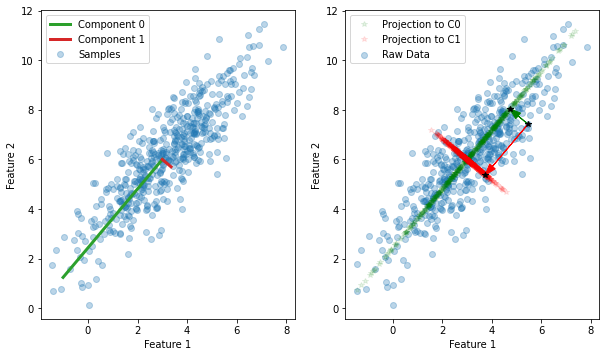

In [4]:
X = generate_data(mean=[3,6])
visualize_data(X, mean=[3,6])

# OLS - Ordinary Least Squares Regression

OLS = [ordinary least squares regression](https://en.wikipedia.org/wiki/Ordinary_least_squares)
aka MLS = multiple linear regression.

The simplest of all regression methods.

We want to model: Y = XB + E, where E is some error.  
This is done by minimizing the square error, $err = \sum (Y - XB)^2$.
Taking the derivative to do so we arrive at $-2X^T(Y - XB) = 0$, 
so $X^TY = X^TXB$, or 

$B = (X^TX)^{-1}X^TY$

The canonical problem is evaluating $(X^TX)^{-1}$ - either (1) X is large and this hard to do, or (2) it is not invertible.

Note that the above is equivalent to 

$y_0 = b_0 +b_1x_{0,1}+\dots b_px_{0,p}$

$y_1 = b_0 +b_1x_{1,1}+\dots b_px_{1,p}$

$\dots$

Implicitly, $x_{i,0} = 1$ for all $i < n$ instances.  We could add another dimension to $X$ so its first column is a constant value of 1, then fit (use fit_intercept=True option). However, this does not work well in other 
instances (supervised situations) and adds another essentially meaningless column since it is just a shift.  A
better approach is to mean-center y so instead we have

$y_0-b_0 = b_1x_{0,1}+\dots b_px_{0,p}$

$y_1-b_0 = b_1x_{1,1}+\dots b_px_{1,p}$

$\dots$

where now the shift is incorporated implicitly on the left hand side.  

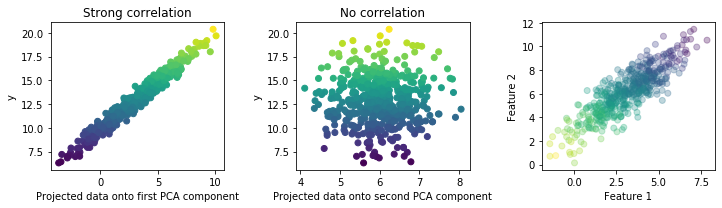

In [5]:
y, pca_gen = generate_response(X, 0, mean=[3,6], seed=1, y_center=10) # Generate some 2D data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
ss = StandardScaler(with_std=False) # Mean center, but don't scale for this example
B = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T), 
              ss.fit_transform(y_train.reshape(-1,1)))

In [7]:
B

array([[-1.61800293],
       [ 0.73825064]])

In [8]:
regr = LinearRegression(fit_intercept=False, normalize=False)
_ = regr.fit(X_train, ss.transform(y_train.reshape(-1,1)))

In [9]:
regr.coef_

array([[-1.61800293,  0.73825064]])

In [10]:
# regr.intercept_ # to see b_0 if not centering y values

In [11]:
# You have to transform back to account for the shift in y
y_pred_sklearn = ss.inverse_transform(regr.predict(X_test))
y_pred_manual = ss.inverse_transform(np.matmul(X_test, B))

Text(0, 0.5, 'Error')

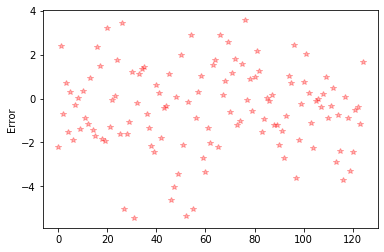

In [12]:
plt.plot(y_pred_sklearn-y_test.reshape(-1,1), 'r*', alpha=0.3)
plt.ylabel('Error')

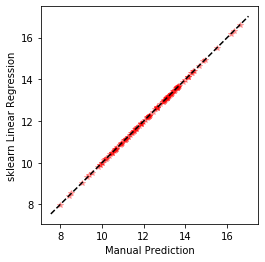

In [13]:
plt.plot(y_pred_manual, y_pred_sklearn, 'r*', alpha=0.3)
_ = plt.gca().set(aspect='equal', xlabel='Manual Prediction', ylabel='sklearn Linear Regression')
add_line([0,1])

# PCA - Principal Component Analysis

PCA = [principal components analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)

This is often used as an unsupervised dimensionality reduction technique, but by itself does not provide a predictive model.  Regression or classification is often performed in the reduced space afterwards.

PCA finds the directions that maximize the covariance of mean-centered X ($\sim X^TX$ **up to a normalizing constant**) then, we project into a lower dimension space made of the top k eigenvectors (determined by the magnitude of the eigenvalue).

It is **sensitive to data scaling**, so X must be standardized if features were measured on different scales and we want to assign equal importance to all of them.  Moreover, during standardization we shift to the mean which is
critical.  Note that PCA is "unsupervised" which means we won't be using $Y$, and therefore we don't need to 
worry about any standardization of that matrix.

Basic steps:
1. Mean center X. (optionally scale the data)
2. Build covariance matrix, $cov(X^T) = X^TX / (n-1)$, where $X$ has shape $n \times p$. Sometimes $n$ not $n-1$ is used.
3. Find (unit) eigenvectors and eigenvalues, sorted from largest to smallest.
4. Project T = XW, where W's k columns are the top k eigenvectors.

Basic idea from [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis):
>"PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on."

In other words, we are rotating (and translating due to mean-centering) the data from its original space so that its orthogonal directions of (successive) maximal variance define the new coordinates.

> "Consider an $n\times p$ data matrix, $X$, with column-wise zero empirical mean (the sample mean of each column has been shifted to zero), where each of the $n$ rows represents a different repetition of the experiment, and each of the $p$ columns gives a particular kind of feature (say, the results from a particular sensor).
>
> Mathematically, the transformation is defined by a set of size $l$ of $p$-dimensional vectors of weights or coefficients $w(k) = (w_1, \dots, w_p)_{(k)}$ that map each row vector $x_{(i)}$ of $X$ to a new vector of principal component scores $t_{(i)} = (t_1, \dots, t_l)_{(i)}$, given by 
>
> $t_{k(i)} = x_{(i)} * w_{(k)}$ (in matrix form, $T = XW$)
>
> in such a way that the individual variables $t_1, \dots, t_l$ of $t$ considered over the data set successively inherit the maximum possible variance from $X$, with each coefficient vector $w$ constrained to be a unit vector."

So we seek the first principal component to be the one with the largest variance of (mean-centered) $X$ if projected along that dimension.  We then remove that effect (do projection, then ignore that direction), and seek an orthogonal direction which has the biggest possible variance of the data; this is repeated until we have all $p$ components.  In practice we seek $l < p$ to reduce the dimensionality of the data. 

For the first component,

$w_{(1)} = {\rm arg max} \left[ \sum_{i=1}^n (t_1)^2_{(i)} \right]$, in matrix form this is equivalent to

$w_{(1)} = {\rm arg max} \left[ \vert\vert Xw \vert\vert^2 \right] = {\rm arg max} \left[ w^TX^TXw\right]$.

Since $w$'s are constrained to be unit vectors, $w^Tw = 1$, and we could write this as a Rayleigh quotient:

$w_{(1)} = {\rm arg max} \left[ \frac{w^TX^TXw}{w^Tw} \right]$

For a positive semidefinite matrix, $X^TX \sim cov(X^T)$ if mean centered; the quotient's maximum possible value is the largest eigenvalue of the matrix, which occurs when w is the corresponding eigenvector of this product. 

Subtracting (deflating?) the  X matrix by this first PC, then repeating this process yields the second PC, and so on. See NIPALS in PLS later on.

In [37]:
X_std = StandardScaler().fit_transform(X)

In [38]:
np.cov(X_std.T) # Numpy

array([[1.00200401, 0.86070939],
       [0.86070939, 1.00200401]])

In [39]:
np.matmul(X_std.T, X_std) / (X.shape[0] - 1) # Manually

array([[1.00200401, 0.86070939],
       [0.86070939, 1.00200401]])

In [40]:
evals, evecs = np.linalg.eig(np.cov(X_std.T)) # Eigenvectors are columns of evecs
ordered = sorted(zip(evals, evecs.T), key=lambda x:x[0], reverse=True)

In [41]:
# Manually project to a new coordinate along the ordered[0][1] eigenvector
T = np.matmul(X_std, ordered[0][1])

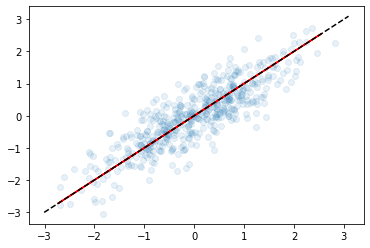

In [42]:
# Visualize projection onto longest semi-axis (=top eigenvector)
X_proj = T.reshape(-1,1)*ordered[0][1]
plt.plot(X_proj[:,0], X_proj[:,1], 'r') # Axes we projected onto in red
plt.scatter(X_std[:,0], X_std[:,1], alpha=0.1)
add_line([0, ordered[0][1][1]/ordered[0][1][0]]) # Plot top eigenvector in black

In [43]:
# Use sklearn to do PCA
pca = PCA(n_components=1)
_ = pca.fit(X_std)

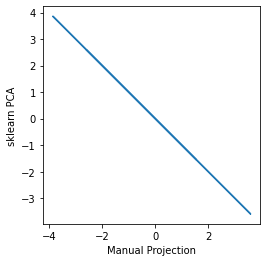

In [44]:
plt.figure()
plt.plot(T, pca.transform(X_std))
_ = plt.gca().set(aspect='equal', xlabel='Manual Projection', ylabel='sklearn PCA')

In [45]:
# Note that the sign of the eigenvectors is liable to swap randomly.  This does not affect things practically
# but it can lead to difference is the apparent projection "direction".

In [46]:
pca.components_ # Sometimes these are called the "loadings"

# The projections (pca.transform(X_std)) are sometimes called the "scores"
# Can do this manually with np.matmul(X_std, pca.components_.T)

array([[-0.70710678, -0.70710678]])

In [47]:
ordered[0][1]

array([0.70710678, 0.70710678])

In [48]:
pca.explained_variance_

array([1.8627134])

## An Aside

See "Acceptance areas for multivariate classification derived by projection methods," Pomerantsev, J. Chemom. 2008.

The PCA decomposition of a matrix has different terminology in different fields.  Here are some examples of comparing how those decompositions are performed vs. what sklearn does.  The primary difference to watch out for  is the fact that sklearn works on the covariance matrix of X, which scales the eigenvalues.  The eigenvectors are unaffected.

**When doing SIMCA, or other methods, the eigenvalues are used directly to compute scores and you need to watch out for this.**

In [54]:
pca = PCA()
_ = pca.fit(X_std)

# This is the conventional way PCA is described in the chemometrics literature
eigval, eigvec = np.linalg.eig(np.matmul(X_std.T, X_std))

# In the statistics literature, usually we have:
# eigval, eigvec = np.linalg.eig(np.matmul(X_std.T, X_std) / (X_std.shape[0]-1) ) 

In [56]:
eigvec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [59]:
pca.components_ # Hese are the eigenvectors, stored in rows, so transpose of this are columns of evecs
# pca.components.T = "Loadings" = "P"
# X = TP^T + E, since P is orthonormal P^T = P^-1
# XP = T (E ~ 0) which shows that, indeed, P are the orthonormal eigenvectors

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

In [65]:
# transform() method works the same since the eigenvectors are NOT different
np.all(np.abs(np.matmul(X_std, pca.components_.T) - pca.transform(X_std)) < 1.0e-12)

True

In [66]:
T = np.matmul(X_std, pca.components_.T)

In [70]:
# T^T * T = diag(e_1, e_2, ...)
np.all(np.abs(np.matmul(T.T,T) - np.eye(2)*eigval) < 1.0e-12)

True

In [ ]:
# These eigenvectors are not directly what sklearn computes, which instead computes the decomposition of the 
# covariance matrix of X - this is (X^T * X) / (N-1); this denominator of N-1 propagates through and does not
# affect the eigenvectors, but does change the eigenvalues by this scale.

In [73]:
eigval

array([929.49398746,  70.50601254])

In [75]:
pca.explained_variance_

array([1.8627134 , 0.14129461])

In [74]:
pca.explained_variance_ * (X_std.shape[0]-1)

array([929.49398746,  70.50601254])

# PCR - Principal Component Regression

PCR = [principle component regression](https://en.wikipedia.org/wiki/Principal_component_regression)

PCA + OLS = PCR.

When the output is correlated with **dimensions that have high variance**, unsupervised PCA will select those 
dimensions automatically and the model retains predictive power.

Note that when the number of dimensions we select, k, is equal to the number of regressors, p, then this is equivalent to OLS (just on a transformed set of data).  

From Wikipedia: "In general, PCR is essentially a shrinkage estimator that usually retains the high variance principal components as covariates in the model and discards the remaining low variance components. Thus it exerts a discrete shrinkage effect on the low variance components nullifying their contribution completely in the original model. In contrast, the ridge regression estimator exerts a smooth shrinkage effect through the regularization parameter inherently involved in its construction. While it does not completely discard any of the components, it exerts a shrinkage effect over all of them in a continuous manner so that the extent of shrinkage is higher for the low variance components and lower for the high variance components. [Frank and Friedman (1993](https://doi.org/10.1080%2F00401706.1993.10485033) conclude that for the purpose of prediction itself, the ridge estimator, owing to its smooth shrinkage effect, is perhaps a better choice compared to the PCR estimator having a discrete shrinkage effect."

PCR has 3 steps:
1. Center the data for PCA
2. Project data into compressed space via PCA (this will not be centered in projection space)
3. Regress transformed data with linear regression (including intercept term)

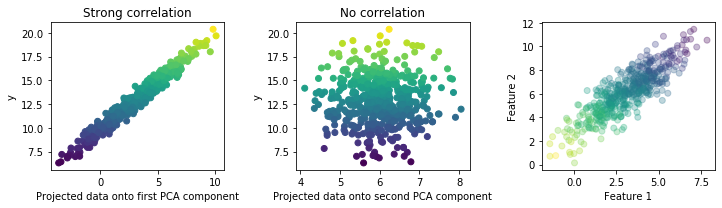

In [33]:
y, pca_gen = generate_response(X, 0, seed=1, mean=[3,6], y_center=10)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

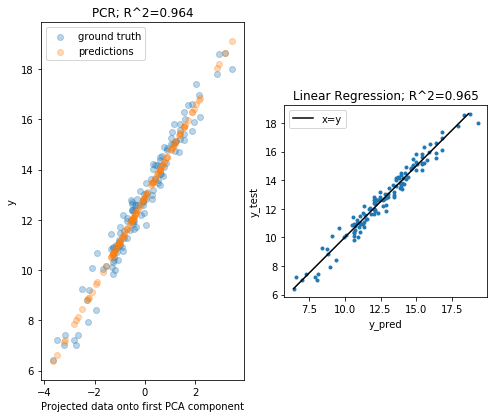

In [35]:
# Note that fit_intercept=True (by default) now because we are NOT necessarily centered in the 
# new projected space (you can see this for yourself if you change this to False).
# This just means we don't have to worry about centering the resulting Y matrix after the PCA.

# 1. Standardized X
# 2. Do PCA in standardized X space
# 3. Fit line (with intercept) to projected space
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression(fit_intercept=True))
pcr.fit(X_train, y_train)

# Linear regression model for comparison 
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(8, 8))

ss = pcr.named_steps['standardscaler']  # retrieve the PCA step of the pipeline
pca = pcr.named_steps['pca']  # retrieve the PCA step of the pipeline

axes[0].scatter(pca.transform(ss.transform(X_test)), y_test, alpha=.3, label='ground truth')
axes[0].scatter(pca.transform(ss.transform(X_test)), pcr.predict(X_test), alpha=.3,
                label='predictions')
_ = axes[0].set(xlabel='Projected data onto first PCA component',
             ylabel='y', 
             title=f"PCR; R^2={pcr.score(X_test, y_test):.3f}", 
             aspect='equal')
_ = axes[0].legend(loc='best')

axes[1].plot(y_pred, y_test, '.')
axes[1].plot([np.min(y_test), np.max(y_test)], 
             [np.min(y_test), np.max(y_test)], 'k-', label='x=y')
_ = axes[1].set(xlabel='y_pred',
                ylabel='y_test', 
                title=f"Linear Regression; R^2={regr.score(X_test, y_test):.3f}", 
                aspect='equal')
_ = axes[1].legend(loc='best')

In [36]:
# The regression line essentially recovered the first eigenvector for the data, which was purposefully used here
# to generate the response, while the second was ignored.
print('Regression coefficients: {}'.format(regr.coef_ )) 
# Original data was mean centered so that is why they are the same:
# y = regr.intercept_ + regr.coef_[0]*x[0] + regr.coef_[1]x[1]
# So if we are looking in x-space only, from the "center of mass" of the X values, regr.coef_ point
# along direction y varies, which we made to vary linearly along the first eigenvector.

print('First eigenvector: {}'.format(pca_gen.components_[0]))

Regression coefficients: [-0.65659938 -0.74268031]
First eigenvector: [-0.64402153 -0.76500736]


# PLS - Projection to Latent Structures

PLS = [partial least squares regression](https://en.wikipedia.org/wiki/Partial_least_squares_regression), aka 'projection to latent structures'.  There are many explanations for the PLS algorithm, but in essence this is actually a scheme to project both X and Y.

$X = TP^T + E$

$Y = UQ^T + F$

where $E$ and $F$ are error terms (assumed to be iid). $X$ has dimensions $n \times p$, and $Y$ has dimensions $n \times l$; $T$ and $U$ are $n \times k$ projections of the $X$ and $Y$ (score) matrices, respectively.  Here, $k \le p$ represents a dimensionality reduction; while $P$ is $p \times k$ and $Q$ is $l \times k$ which are the orthogonal loading matrices.

A helpful definition of the [loading matrices](https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another) can be found on stackexchange. The $T=P$ and $Q$ matrices are clearly related to the eigenvectors found during PCA.  Recall that an orthonormal matrix (columns and rows are orthonormal), $A$, has the property that $AA^T = I$; thus, $A^{-1}AA^T = A^{-1}I$ or $A^T = A^{-1}$.  Since the inverse is equal to its transpose, clearly the above expressions (ignoring error term) we can be rearranged to look like $XP = T$.  This reveals that P is the matrix of top eigenvectors (see PCA above); sometimes eigenvectors are scaled to unit vectors so you will see this multiplied by the square root of the eigenvalues (recall these are found from covariance of e.g., $A^TA$, so we need to "remove the square") to restore their "size" (as in the link above). **Because of data scaling, it seems like this gets lost or overlooked, but works out because of the unit scale.**

The PLS algorithm rotates and projects X into a lower k-dimensional space, represented by the scores matrix T (x-scores), and similarly projects Y into the same dimensional space, U (y-scores), where the projection ($P$ and $Q$ matrices) is determined by maximizing the covariance between T and U.

This is particularly useful when we have either the case where (1) we have more regressors than instances ($p > n$), or (2) when the output is correlated with **dimensions that have low variance**, in which case unsupervised PCA will discard those dimensions, and with them, the PCR's predictive power. Note that (1) often occurs when we many correlated dimensions and so we have very few independent regressors in truth.

In PCR, the PCs are the directions that maximize variance in X; in PLS, we seek the directions that maximize the variance "X times Y" so that Y contributes information to the directions that we are going to choose (supervised method).  It turns out the matrix in question is $Y^TX$, though this is not obvious at this point why.

Originally, this was inspired by the [non-linear iterative partial least squares](https://cran.r-project.org/web/packages/nipals/vignettes/nipals_algorithm.html) algorithm as described [here](/examples/common_chemometrics/1-s2.0-0003267086800289-main.pdf); this is just an interative algorithm to find principal components.  Essentially, one could do NIPALS to get an eigendecomposition of $X$ and $Y$ independently, then do regression between them, as in PCR; however, now $X$ and $Y$ have independent decompositions which might not be good representations of each other, as we saw in the example above.  One way to circumvent this is to "trade" information during the iteration letting these decompositions become influence by each other.  Later, it was shown that this has other (more natural) interpretations, as described below and alluded to above.  These do not require the use of the NIPALS algorithm and so a SVD can be done instead (more efficient).  The advantage of NIPALS is that you can compute only the leading eigenvectors that you desire.

SVD formulation.
1. Mean-center X and Y.  Certain versions of PLS do not require Y centering as it is done automatically. **Y is not scaled, only centered - because X's loadings are going to be used below we can then use the eigenvectors directly (I believe); Y is incorporated via OLS so its scale is built in.**
2. Find directions equivalent to maximizing (co)variance of X "and" Y instead of just X. This is not the logic behind how PLS was originally derived, but it is a common modern statistical explanation for it (see Hastie et al. "The Elements of Statistical Learning." or [here](https://www.jstor.org/stable/pdf/1269656.pdf?casa_token=cr6WyBAN7acAAAAA:OknO2R0VHg41_q0UOTo4Ribt2Z7dH8b5meHacIqSdT69GXeQJ_zd8N26I2EVexM0-bOMNqpaD4YYWuwMgw-1BenvoDcDSG10sfoimwCYOETgz9a8Lw) for more details).
Following the logic from the PCA section ending with the Rayleigh quotient, we are now looking for eigenvectors/values of $(Y^TX)^T(Y^TX)$ (instead of $X^TX$ for PCA). So do SVD on $Y^TX$ to get [eigenvalue decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition#SVD_and_spectral_decomposition) of $(Y^TX)^T(Y^TX)$. Via SVD, we have $Y^TX = USW$, where the columns of $W$ (right-singular vectors) are eigenvectors of $(Y^TX)^T(Y^TX)$.  
3. Project X to T by using W matrix (only take top k eigenvectors). Note that Y was already used to produce T.
4. Linearly regress Y vs T (T=XW), so we have Y = TA (can use exact OLS matrix result).
5. Convert these coefficients so we have Y vs X, Y = XB.
 - Observe: Y = TA = (XW)A
 - Since we want Y = XB, B = WA
 
Note that PLS1 and others may do this iteratively via the NIPALS algorithm for estimating principal components, but the above is based on SVD which is more memory efficient.

More references:
* See code at [cimbc](https://github.com/CIMCB/cimcb).
* A nice [blog post](https://nirpyresearch.com/partial-least-squares-regression-python/).
* An old, but thorough [tutorial](/examples/pca_pls/1-s2.0-0003267086800289-main).

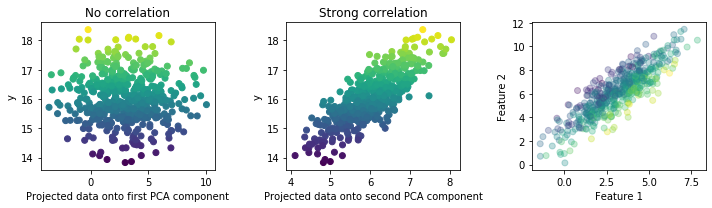

In [74]:
y, pca_gen = generate_response(X, dimension=1, mean=[3,6], y_center=10)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

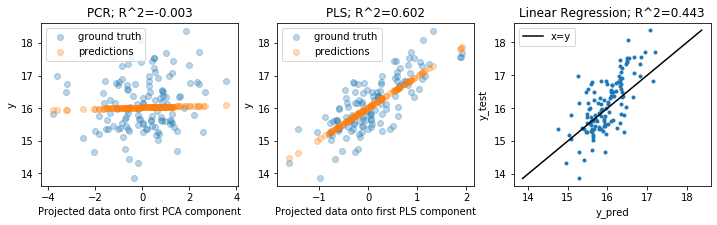

In [93]:
# PCR for comparison
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression(fit_intercept=True))
pcr.fit(X_train, y_train)

# Linear regression for comparison
regr = LinearRegression(fit_intercept=False)
linear_ss = StandardScaler()
regr.fit(X_train, linear_ss.fit_transform(y_train.reshape(-1,1)))
y_pred = linear_ss.inverse_transform(regr.predict(X_test))
  
# PLS model
# By default performs scaling of X and y, but this is not necessary (only centering matters)
# Note that algorithm='svd' can be specified in certain version of sklearn
# PLSRegression automatically centers the data behind the scenes
pls = PLSRegression(n_components=1, scale=False) 
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

ss = pcr.named_steps['standardscaler']
pca = pcr.named_steps['pca']  # retrieve the PCA step of the pipeline

axes[0].scatter(pca.transform(ss.transform(X_test)), y_test, alpha=.3, label='ground truth')
axes[0].scatter(pca.transform(ss.transform(X_test)), 
                pcr.predict(X_test), 
                alpha=.3,
                label='predictions')
axes[0].set(xlabel='Projected data onto first PCA component',
             ylabel='y', 
             title=f"PCR; R^2={pcr.score(X_test, y_test):.3f}")
_ = axes[0].legend()

axes[1].scatter(pls.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[1].scatter(pls.transform(X_test), pls.predict(X_test), alpha=.3,
                label='predictions')
axes[1].set(xlabel='Projected data onto first PLS component',
             ylabel='y', 
             title=f"PLS; R^2={pls.score(X_test, y_test):.3f}")
_ = axes[1].legend()

axes[2].plot(y_pred, y_test, '.')
axes[2].plot([np.min(y_test), np.max(y_test)], 
             [np.min(y_test), np.max(y_test)], 'k-', label='x=y')
_ = axes[2].set(xlabel='y_pred',
                ylabel='y_test', 
                title=f"Linear Regression; R^2={regr.score(X_test, linear_ss.transform(y_test.reshape(-1,1))):.3f}")
_ = axes[2].legend()

In [94]:
# The manual version
ss_x = StandardScaler(with_std=False) # In this example we set scale=False for pls - just be consistent here
ss_y = StandardScaler(with_std=False)
u_, s_, w = np.linalg.svd(np.matmul(ss_y.fit_transform(y_train.reshape(-1,1)).T,
                                    ss_x.fit_transform(X_train) 
                                    ))
# pls.x_rotations_ = w[:,0] -> columns are the eigenvectors (may differ by sign)

T = np.dot(ss_x.transform(X_train), w[:,0]).reshape(-1,1) # = pls.x_scores_
A = np.dot(np.dot(np.linalg.inv(np.dot(T.T,T)), T.T), 
           ss_y.transform(y_train.reshape(-1,1))) # OLS so we have Y = TA
B = w[:,0].reshape(-1,1)*A # = pls.coef_

# Remember to get your correct answer back you have "de-center" Y
manual_prediction = ss_y.inverse_transform(np.matmul(ss_x.transform(X_test), B))
sklearn_prediction = pls.predict(X_test)

np.max(np.abs(manual_prediction - sklearn_prediction))

3.552713678800501e-15

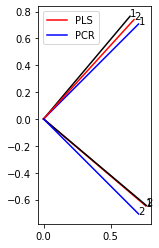

In [95]:
# PCA [black] - how the data was generated.

# PLS [red] - eigenvectors of Y^TX are almost equivalent in this case to the eigenvectors of 
# X because of the way we chose to generate the data; however, PLS has *correctly* reversed the
# order to make the "smaller" X eigenvector the "first" eigenvector of the space Y^TX.
# Recall: pls.x_rotations_ = w[:,i] -> columns are the eigenvectors (may differ by sign)

# PCR - similar to PCA, but X data was scaled for this PCA so 

# Fit both components for this illustration
pls2 = PLSRegression(n_components=2, scale=False) 
pls2.fit(X_train, y_train)

pcr_ = make_pipeline(StandardScaler(), PCA(n_components=2), LinearRegression(fit_intercept=True))
pcr_.fit(X_train, y_train)

signs = (np.sign(pca_gen.components_.T)*np.sign(pls2.x_rotations_))[0,:] # Make signs consistent for easier visualization
signs2 = (np.sign(pcr_.named_steps['pca'].components_.T)*np.sign(pls2.x_rotations_))[0,:]
for i in range(2):
    plt.plot([0, pls2.x_rotations_[0,i]], [0, pls2.x_rotations_[1,i]], 'r',
             label='PLS'if i==0 else ''
            )
    plt.text(pls2.x_rotations_[0,i], pls2.x_rotations_[1,i], '{}'.format(i+1))
    
    plt.plot([0, pca_gen.components_[i,0]*signs[i]], [0, pca_gen.components_[i,1]*signs[i]], 'k')
    plt.text(pca_gen.components_[i,0]*signs[i], pca_gen.components_[i,1]*signs[i], '{}'.format(i+1))
    
    plt.plot([0, pcr_.named_steps['pca'].components_[i,0]*signs2[i]], 
             [0, pcr_.named_steps['pca'].components_[i,1]*signs2[i]], 'b', label='PCR'if i==0 else '')
    plt.text(pcr_.named_steps['pca'].components_[i,0]*signs2[i], 
             pcr_.named_steps['pca'].components_[i,1]*signs2[i], '{}'.format(i+1))
plt.gca().set(aspect='equal')
plt.legend(loc='best')

# Ridge & Lasso 

[Ridge regression/classification](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression) is simple OLS with a regularization penalty applied (L2 norm).  Similarly, [Lasso](https://scikit-learn.org/stable/modules/linear_model.html#lasso) applies an L1 penalty to OLS.

It has been suggested that ridge would be prefereable to PLS since it also reduces covariant features
but it tends to be simpler to interpret and implement.  It is also more specific about which features are 
eliminated rather than removing entire PCs which are composed of all of them.  This is why it is easier to 
interpret other shrinkage methods like L2 (Ridge) or L1 (Lasso) regression more easily.
 - Hastie et al. "The Elements of Statistical Learning"
 
See sklearn's [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier) function and [user guide](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression) entry for more details.

# LDA - Linear Discriminant Analysis

---
LDA as a dimensionality reduction technique:

According to [Wikipedia](https://en.wikipedia.org/wiki/Linear_discriminant_analysis):
    
> "Linear discriminant analysis (LDA), normal discriminant analysis (NDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics and other fields, to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification. "

With PCA, we found the orthogonal principal components that characterized the spread of the data, i.e., the covariance of X with itself (unsupervised).  With PLS, we looked for directions that characterized the covariance of X and Y (supervised).  LDA is a supervised method which instead looks for axes that maximize the separation between labelled classes.  This is done by finding the eigenvectors of the matrix $S_W^{-1}S_B$, where $S_W$ is the within-class scatter matrix and $S_B$ is the between-class scatter matrix.

Sebastian Raschka has a nice discussion [here](https://sebastianraschka.com/Articles/2014_python_lda.html) with illustrations in python. 
> "It should be mentioned that LDA assumes normal distributed data, features that are statistically independent, and identical covariance matrices for every class. However, this only applies for LDA as classifier and LDA for dimensionality reduction can also work reasonably well if those assumptions are violated."

PCA can be used to perform dimensionality reduction by only selecting the leadin $k$ eigenvectors from the covariance matrix; assuming it is full rank, we have as many dimensions as the size of that matrix.  However, in LDA, the matrix $S_W^{-1}S_B$ will only have at most ${\rm min}(p, c-1)$ non-zero eigenvectors where $p$ is the number of features and $c$ is the number of classes.  Thus, if we want to separate 2 classes, LDA will only be able to return the single axes that separates the best.  In such a case, it might be better to even do PCA if we desire a low, but higher than 1-, dimensional result.

In general though, the intuitive explanation for LDA is that it finds the orthogonal axes that best separate classes.  Thus, it is a very useful dimensionality reduction approach for classification.  It is particularly helpful in identifying a subspace that is highly discriminative, in which other models can be used to compute decision boundaries.  For example, a pipeline might look like:

1. Standardize data
2. LDA to project into a small number of dimensions
3. Use logistic regression to classify

---
LDA as a classifier

It has already been noted that LDA makes certain assumptions:
1. normal distributed data, 
2. features that are statistically independent 
3. identical covariance matrices for every class

Why is that?  LDA can actually be derived from probabilistic models that describe the class conditional distribution of the data, namely $P(y=k|x)$, for class $k$ given $x$.

scikit-learn discusses this [here](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda-math), and more details can be found in Hastie et al. "The Elements of Statistical Learning" (2008).

From Bayes' Law we have

$P(y=k|x) = \frac{P(x|y=k)P(y=k)}{P(x)} = \frac{P(x|y=k)P(y=k)}{\sum_l P(x|y=l)P(y=l)} \sim P(x|y=k)P(y=k)$

The denominator is a constant which can be disregarded. In LDA (and [QDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)) one simply chooses to model $P(x|y)$ as a multivariate Gaussian as follows:

$P(x|y) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} {\rm exp}\left( -\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)\right)$

where $\Sigma_k$ is the covariance matrix of class $k$ and $\mu_k$ is mean vector of class $k$; $d$ is the original dimensionality of $x$. The argument of the exponent is the [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance). QDA uses the covariance matrices of each class, however, if we assume they are the same, then we can write:

${\rm ln}P(y=k|x) = {\rm ln}P(x|y=k) + {\rm ln}P(y=k) + C = -\frac{1}{2}(x-\mu_k)^T\Sigma^{-1}(x-\mu_k) + {\rm ln}P(y=k) + C'$

where $C'$ absorbs the constants from the Gaussian and denominator in Bayes' Law.  This can be rewritten as:

${\rm ln}P(y=k|x) = \omega_k^Tx + \omega_{k,0} + C$

where $\omega_k = \Sigma^{-1}\mu_k$ and $\omega_{k,0} = -\frac{1}{2}\mu_k^T \Sigma^{-1} \mu_k + {\rm ln}P(y=k)$.  Again, in practice the $C$ is neglected.  sklearn stores theses as coef_ and intercept_ in the LDA object.  The linear nature of this equation is why it is known as "linear" DA, vs. when we make no assumptions about $\Sigma$ being equal for all classes, the result is quadratice, hence QDA.

Consequently, the above decision function can be computed (see sklearn.discrimininant_analysis.LDA.decision_function) to provide the log probability of a given class.  Normalizing over all classes gives the sklearn.discrimininant_analysis.LDA.predict_proba result, or the ability to predict the class probability.  LDA assigns a point to a class which it is closest to in terms of Mahalanobis distance.

---
Estimating the covariance matrix

The assumption is LDA is that the covariance matrix is the same for each class, but how do we actually measure this?  In practice, this is done by a (de-biased) weighted average (i.e., the [pooled variance](https://en.wikipedia.org/wiki/Pooled_variance)) of each class' covariance matrix.

$\Sigma = \frac{\sum_{i=1}^k(N_i-1)\Sigma_k}{\sum_{i=1}^k(N_i-1)}$

See this [stackexchange question](https://stats.stackexchange.com/questions/90615/estimating-the-covariance-matrix-in-linear-discriminant-analysis).

## Manually Computing LDA Probability

In [873]:
from sklearn.preprocessing import LabelEncoder
def lda_ln_prob(X, X_train, y_train):
    """Compute the lnP of classes based on LDA model of data."""
    
    # Assume that we are comparing to LDA using pre-scaled data
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    
    enc = LabelEncoder()
    y_train = enc.fit_transform(y_train.ravel())
    means = {}
    for c in [enc.transform([class_])[0] for class_ in enc.classes_]:
        mask = y_train == enc.inverse_transform([c])[0]
        means[c] = np.mean(X_train[mask], axis=0)
        
    # Compute pooled covariance estimate
    sigma = np.zeros((X_train.shape[1], X_train.shape[1]))
    for c in [enc.transform([class_])[0] for class_ in enc.classes_]:
        mask = y_train == enc.inverse_transform([c])[0]
        a = np.sum(mask)
        sigma += (a-1)*np.cov(X_train[mask].T)
    sigma /= (X_train.shape[0] - len(np.unique(y_train)))
    # Note: lda.covariance_ seems to store sigma/n not sigma/(n-k)
    # however, the (n-k) factor is correctly used to compute other 
    # properties below.
    
    # lda.coef_
    coef = []
    for c in [enc.transform([class_])[0] for class_ in enc.classes_]:
        coef.append(np.matmul(np.linalg.inv(sigma), means[c].T))
        
    # lda.intercept_
    intercept = []
    for c in [enc.transform([class_])[0] for class_ in enc.classes_]:
        intercept.append(-0.5*np.matmul(np.matmul(means[c], np.linalg.inv(sigma)), means[c].T)+np.log(np.sum(y_train==enc.inverse_transform([c])[0])/X_train.shape[0]))
    
    d = X_train.shape[1]
    probs = np.zeros((X.shape[0], len(enc.classes_)))
    for i,x in enumerate(ss.transform(X)):
        for j in [enc.transform([class_])[0] for class_ in enc.classes_]:
            probs[i,j] = np.dot(coef[j], x) + intercept[j] # Constants related to Gaussian prefactor are ignored in sklearn
            
    return probs, coef, intercept

In [853]:
import sklearn
from sklearn.datasets import make_blobs
X, Y = sklearn.datasets.make_blobs(n_samples=100, 
                            n_features=5, 
                            centers=3, 
                            cluster_std=.1,  
                            shuffle=True, 
                            random_state=0)

In [855]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ss = StandardScaler()
lda = LDA(n_components=2, store_covariance=True)
_ = lda.fit(ss.fit_transform(X), Y)

In [876]:
my_ln_probs, coef, intercept = lda_ln_prob(X, X, Y.reshape(-1,1))
sklearn_ln_probs = lda.decision_function(ss.transform(X))

# To prevent overflow
my_shifted_probas = (my_ln_probs.T - np.max(my_ln_probs, axis=1)).T

my_probas = (np.exp(my_shifted_probas).T/np.sum(np.exp(my_shifted_probas), axis=1)).T
sklearn_probas = lda.predict_proba(ss.transform(X))

In [877]:
np.all(np.abs(my_ln_probs - sklearn_ln_probs) < 1.0e-9) # Manual decision function agrees with sklearn

True

In [878]:
np.all(np.abs(my_probas - sklearn_probas) < 1.0e-9) # Manual class probability agrees with sklearn

True

In [881]:
np.max(np.abs(lda.coef_ - coef) < 1.0e-9) # Manual coef agrees with sklearn

True

In [882]:
np.max(np.abs(lda.intercept_ - intercept) < 1.0e-9) # Manual intercept agrees with sklearn

True

## LDA + Logistic Regression

### Illustration

In [890]:
data = sklearn.datasets.load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, train_size=0.8, random_state=0)

In [917]:
# This function is from Raschka & Mirjalili's book, found here: https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch02/ch02.ipynb

from matplotlib.colors import ListedColormap

def plot_2D_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=data.target_names[cl], 
                    edgecolor='black')
        
    plt.legend(loc='best')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')

In [918]:
# Scale and perform LDA to project into 2D
ss = StandardScaler()
lda = LDA(n_components=2)
X_train_std_lda = lda.fit_transform(ss.fit_transform(X_train), y_train)

In [919]:
# Train a LR classifier in that 2D space
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, random_state=0)
_ = lr.fit(X_train_std_lda, y_train)

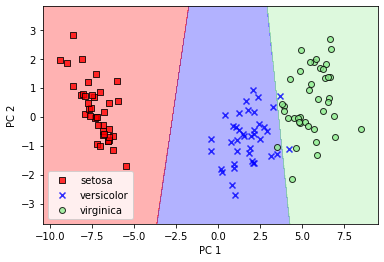

In [920]:
plot_2D_decision_regions(X_train_std_lda, y_train, lr, resolution=0.02)

### As a pipeline

In [926]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LDA()),
    ('lr', LogisticRegression())
]
)

grid = [
    {'lda__n_components':[1,2], # Limited to n_classes-1
     'lr__C':np.logspace(-5,0,10),
     'lr__random_state':[0]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=grid,
    refit=True,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=0),
    n_jobs=-1
)
_ = gs.fit(X_train, y_train)

In [927]:
gs.best_params_

{'lda__n_components': 2, 'lr__C': 0.2782559402207126, 'lr__random_state': 0}

In [928]:
gs.score(X_test, y_test)

1.0

# PLS-DA - PLS Discriminant Analysis

PLS can also be applied to classification problems.  The general idea is to perform a PLS decomposition 
between X and y, where now y is one-hot encoded for the different classes.  For binary classification, a simple 
0 or 1 is adequate.  The scores that come from the PLS decomposition are then used as an input to a 
classification model.  So really, PLS-DA is just using PLS to find a good subspace, then performing classication
on the transformed coordinates in that space; this classification is the "discrimination" which can be done
by any number of methods.  The PLS outputs floating point numbers not integers, so a decision needs to be made
on how to "cluster" and assign points to a given class. Some common methods are:
* Closest class centroid - obviously that Euclidean distance in PLS-DA score space (projection) is not necessarily a good representation of class differences so you need to validate this with test set, etc. See this [paper](https://link.springer.com/article/10.1007/s11306-007-0099-6) and more discussion in [Pomerantsev et al.](https://onlinelibrary.wiley.com/doi/abs/10.1002/cem.3030).
* Thresholding (some cutoff distance)
* Some statistical confidence bounds based on tolerable mis-classfication error rates
* Build logistic regression, or other decision boundary, etc. in score (projected) space - this is better than option (1) which avoids relying on distance being proportional to likelihood of a class.

This essentially just uses (supervised) PLS to find a good subspace to project into.  However, we could also use something like LDA instead (discussed in the previous section); for LDA we are bounded by #dimensions <= min(n_classes - 1, n_features), which we are not in PLS.  So if n_classes is low, LDA can only find a very low-D subspace; it may be better to find some space between that and n_features, which PLS can provide.

PLS-DA is widely applied in cheminformatics research since we often have a p > n instance which can be handled
automatically with PLS.  This is especially true of -omics fields.  

However, nonlinear techniques such as [artificial neural networks can also be used](https://link.springer.com/article/10.1007/s11306-020-1640-0) and these approaches are better defined, and have been shown to perform as well; however, I suspect they can actually outperform them.

A nice [blog post](https://nirpyresearch.com/pls-discriminant-analysis-binary-classification-python/).

PLS-DA originated with Wold (also PLS)
* [Wold 1975](https://link.springer.com/article/10.1007/s11306-020-1640-0#ref-CR47)
* [Wold et al. 1993](https://link.springer.com/article/10.1007/s11306-020-1640-0#ref-CR48)

The [pyChemometrics](https://github.com/Gscorreia89/pyChemometrics) python package.

#https://www.mfitzp.com/article/partial-least-squares-discriminant-analysis-plsda/

A thorough review of the state of the art PLS-DA by Lee et al. is available [here](pls_da_review_2018.pdf)

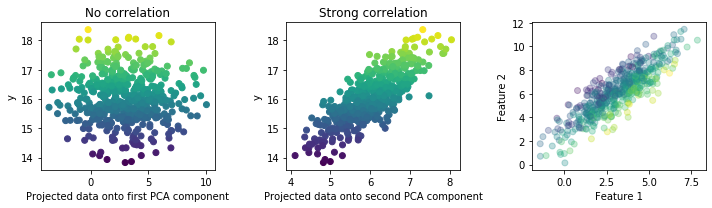

In [1049]:
y, pca_gen = generate_response(X, dimension=1, mean=[3,6], y_center=10)

In [1050]:
# Make 3 classes based on quantiles
quantiles = np.quantile(y, [0.25,0.75])
y_classes = np.array(["Class 1"]*len(y))
y_classes[y < quantiles[0]] = "Class 1"
y_classes[(quantiles[0] < y) & (y < quantiles[1])] = 'Class 2'
y_classes[y > quantiles[1]] = 'Class 3'

In [397]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder().fit(y_classes.reshape(-1,1))

NameError: name 'y_classes' is not defined

In [1052]:
# Classifications should be stratified
X_train, X_test, y_train, y_test = train_test_split(X, ohe.transform(y_classes.reshape(-1,1)).toarray(),
                                                    random_state=1,
                                                    stratify=y_classes)

In [1053]:
# Even though the example above was for Y with a single dimension (regression), it works correctly for
# OHE variables (multidimensional Y)
n_classes = len(np.unique(y_classes))
n_comps = 1

# The manual version
ss_x = StandardScaler(with_std=False) # In this example we set scale=False for pls - just be consistent here
ss_y = StandardScaler(with_std=False)
u_, s_, w = np.linalg.svd(np.matmul(ss_y.fit_transform(y_train).T,
                                    ss_x.fit_transform(X_train) 
                                    ))
T = np.dot(ss_x.transform(X_train), w[:,:n_comps]).reshape(-1,1) 
A = np.dot(np.dot(np.linalg.inv(np.dot(T.T,T)), T.T), 
           ss_y.transform(y_train))
B = w[:,0].reshape(-1,1)*A

manual_prediction = ss_y.inverse_transform(np.matmul(ss_x.transform(X_test), B))

# Use sklearn's PLS
pls = PLSRegression(n_components=n_comps, scale=False)
pls.fit(X_train, y_train)

# Confirm they are identical
assert(np.all(np.abs(manual_prediction - pls.predict(X_test)) < 1.0e-4))

In [1054]:
pls.x_rotations_

array([[ 0.83080294],
       [-0.55656669]])

In [1055]:
# A simple prediction metric from pyChemometrics (not very good - don't use this usually!):

# Find the closest (Euclidean distance) class mean (centroid) for each sample in the score space.
class_means = np.zeros((n_classes, n_comps))
for curr_class in range(n_classes):
    class_means[curr_class, :] = np.mean(pls.transform(X_train)[y_train[:,curr_class]==1])

# Predict test class
closest_class_mean = lambda x: np.argmin(np.linalg.norm((x - class_means), axis=1))
pred_scores = pls.transform(X_test)
class_pred = np.apply_along_axis(closest_class_mean, axis=1, arr=pred_scores)

accuracy = np.sum(class_pred == np.argmax(y_test, axis=1)) / y_test.shape[0]

In [1056]:
class_means

array([[-0.62122158],
       [-0.02856476],
       [ 0.67804722]])

In [1057]:
accuracy

0.608

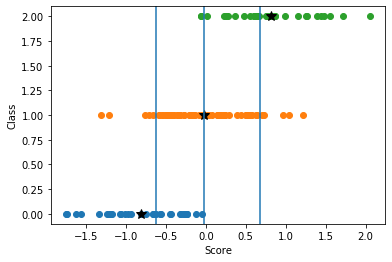

In [1058]:
for c in [0, 1, 2]:
    mask = np.argmax(y_test, axis=1) == c
    plt.plot(pred_scores[mask], [c]*np.sum(mask), 'o')
    plt.plot(np.mean(pred_scores[mask]), c, 'k*', ms=10)
plt.xlabel('Score')
plt.ylabel('Class')
for m in class_means:
    plt.axvline(m)

In [1059]:
# In this case, a slightly higher accuracy can be obtained by instead looking at the prediction
# (argmaxing) of the one-hot-encoded output back in the full 3D space.
np.sum(np.argmax(pls.predict(X_test), axis=1) == np.argmax(y_test, axis=1)) / y_test.shape[0]

0.696

## Hard vs. Soft PLS-DA

* Based on "Multiclass partial least squares discriminant analysis: Taking the right way—A critical tutorial," by
Pomerantsev and Rodionova, Journal of Chemometrics, 32 (2018).
* See thi [github repo](https://github.com/yzontov/pls-da) for a MatLab implementation.

Steps:
1. One-hot encode Y for different classes. 

> This means that classes form the vertices of $k$-dimensional simplex, where we have $k$ classes.  Following [Indahl et al.](https://onlinelibrary.wiley.com/doi/abs/10.1002/cem.1061), you could reduce the dummy matrix to remove a dimension;  if you have 4 classes, this forms a tetrahedron - i.e., represent classes as +1 for k-1 instances and for the last one indicate it as all zeros.
>
> Convert
>
> $$
\begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$
>
> to
>
>$$
\begin{bmatrix} 
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
0 & 0 & 0 \\
\end{bmatrix}
$$
>
>The first matrix is connected by a hyperplane and so strictly the space spanned by these classes is $k$-1 dimensional.  This is made more explicitly clear by the second matrix which clearly has rank $k-1$ and encloses a tetrahedral volume.

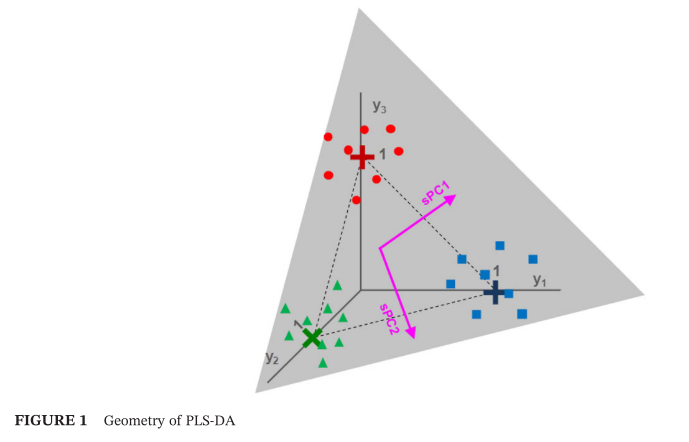

In [1061]:
Image(filename='fig1_pomerantsev_2018.png', width=500) # Figure from P&R paper above

2. Standardize X (may or may not be scaled), and mean-center Y
3. Perform [PLS2 regression](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html) to obtain the predictions, $\hat{Y}$.
4. Compare $\hat{Y}$ to OHE vectors and choose the closest one as a method of classification.  

However, step 4 is tricky because of the fact that $\hat{Y}$ has rank $k$-1.  if you tried to compute a Euclidean distance ($k$-D space) between one vertex and a given prediction, it would be possible - but this would not really be correct since we really need to the distance in the ($k-1$)-D space.  If you just use Indahl's approach and do PLS2 with the second matrix, it seems you can proceed; however, Pomerantsev and Rodionova proposed that you instead use the normal OHE matrix (the first one above) and then perform PCA on the $\hat{Y}$ response.  The PCA will naturally only have $k-1$ non-zero eigenvalues, so you can simply use this to project the responses into that (hyper)plane.  You can then compute the distances in that hyperplane to perform classification.  These steps are as follows:

>1. OHE response vector
>2. Perform PLS2 to get $\hat{Y}_{\rm train}$
>3. Perform PCA on $\hat{Y}_{\rm train}$ - to do this, you must first center $\hat{Y}_{\rm train}$ (using Y). Project into $k-1$ dimensional space to obtain the PCA loadings matrix $T$.
>4. Classify $T$.

In summary, $(X, Y) \xrightarrow{\text{PLS2}} \hat{Y} \xrightarrow{\text{PCA}} T$.  This is essentially a composition of multiple subspace projection methods, but ultimately only the PCA scores (T) are used to do the classification.

This assumes that $k <$ n_features.  Since we are projecting into a $k$-D space and relying on a PCA transformation of that space this is a requirement.  Usually when PLS is being used this is the case.

Pomerantsev and Rodionova propose 2 different ways to perform step 4: a hard classification and a soft classification.

### Hard PLS-DA

**Hard classification assigns an object to 1 and only 1 class.**  It is not valid to use this approach for validation studies. See [Rodionova et al.](https://www.sciencedirect.com/science/article/pii/S0165993615302193) for more details.

As discussed in the LDA section, LDA uses multivariate Gaussians to model class probabilities.  Recall that this essentially assigns a point to the class it is closest to in terms of its Mahalanobis distance.  P&R use this as a classification rule since it is easy to perform.

The pooled covariance matrix is known from PCA:

$$
cov(T) = T^TT = \Lambda = {\rm diag}\left( \lambda_1, \dots, \lambda_{k-1} \right)
$$

Is is a diagonal matrix because PCA found orthogonal components.  The class centers, $c_k$, are computed by column centering them (since this was done in the PCA) then using the PCA eigenvectors to project to this $k-1$ dimensional space.

The distance from a projected point, $t_i$, to a class, $k$ is given by its Mahalanobis distance:

$$
d_{ik} = (t_i - c_k)\Lambda^{-1}(t_i - c_k)^{T}
$$

Note that depending on if we represent things as columns or rows the transpose may be on the first or second difference term. Importantly, in the P&R paper the authors do not account for the fact that the LDA rule takes into account class prior probability (i.e., class imbalance).  For balanced classes there is no difference between this distance rule and the LDA one.  It is perfectly fine to use the Mahalanobis distance as classification metric, but it is not the same as LDA strictly speaking.  You could also use other classifications approaches like trees, QDA, etc. - it doesn't matter, just classify $T$ based on some method and be sure to appropriately ross validate and test the method.

It may be advantageous NOT to have this depend on class prior probabilities since it will influence the (hyper)area of space allocated to a given class.

P&R discuss class imbalance as this point was raised in a previous paper they discuss in their work, and show that class imbalance make little to no difference for the dataset(s) they are looking at.  This is of course subjective.

In [437]:
def hard_plsda(X_test, X_train, y_train, n_components=2):
    # 1. Preprocess data (one hot encoding, centering)   
    ohencoder = OneHotEncoder(sparse=False) # Convert integers to OHE
    x_pls_scaler = StandardScaler(with_mean=True, with_std=True) # Center and scale X
    y_pls_scaler = StandardScaler(with_mean=True, with_std=False) # Center do not scale Y
        
    y_train = y_pls_scaler.fit_transform(ohencoder.fit_transform(y_train.reshape(-1,1)))
    X_train = x_pls_scaler.fit_transform(X_train) 
    
    X_test = x_pls_scaler.transform(X_test) 
    
    # 2. PLS2
    plsda = PLSRegression(n_components=n_components, 
                          max_iter=5000, 
                          tol=1.0e-9,
                          scale=False) # Already scaled, centered as needed
    _ = plsda.fit(X_train, y_train)
    y_hat_train = plsda.predict(X_train)
    y_hat_test = plsda.predict(X_test)
        
    # 3. Perform PCA on y_hat_train
    pca = PCA(n_components=len(ohencoder.categories_[0])-1, random_state=0)
    T_train = pca.fit_transform(y_pls_scaler.transform(y_hat_train))
    T_test = pca.transform(
        y_pls_scaler.transform(
            y_hat_test
        )
    )
    class_centers = np.matmul(
        y_pls_scaler.transform(
            np.eye(len(ohencoder.categories_[0]))
        ),
        pca.components_.T,
    )

    # Check that covariance of T is diagonal matrix made of eigenvalues from PCA transform
    L = np.cov(T_train.T)
    assert(np.allclose(L, np.eye(len(pca.explained_variance_))*pca.explained_variance_))
    
    # 4. Compute Mahalanobis distance and classify based on the smallest distance
    d = []
    for t in T_test:
        d.append([np.matmul(np.matmul((t - class_centers[i]), 
                                np.linalg.inv(L)), 
                      (t - class_centers[i]).reshape(-1,1))[0]
             for i in range(len(class_centers))])    
    d = np.array(d)

    prediction = np.array([ohencoder.categories_[0][c] for c in np.argmin(d, axis=1)] )
    
    return prediction

In [438]:
import sklearn
from sklearn.datasets import make_blobs
X, Y = sklearn.datasets.make_blobs(n_samples=100, 
                            n_features=5, 
                            centers=3, 
                            cluster_std=.1,  
                            shuffle=True, 
                            random_state=0)

X_train, y_train = X[:80], Y[:80]
X_test, y_test = X[80:], Y[80:]

prediction = hard_plsda(X_test, X_train, y_train, n_components=5)

(80, 3)


In [436]:
np.sum(prediction == y_test) / len(y_test)

1.0

### Soft PLS-DA

**Soft PLS-DA may assign a point to 1 or more classes, or to none at all.  This means it can be used for authentication studies.**

Rather than use LDA (which assumes all classes have the same covariance matrix), P&R suggest using QDA to instead classify T.  The within-class covariance matrix is

$$
S_k = \frac{1}{I_k} \sum_{i \in \omega(k)} (t_i-c_k)^T(t_i-c_k)
$$
 
where there are $I_k$ samples from class $k$ and $\omega(k)$ denotes which data points (in the training set) belong to class $k$.  The new Mahalanobis distance follows as:

$$
d_{ik} = (t_i - c_k)S_k^{-1}(t_i - c_k)^{T}
$$

Assuming the distances follow a chi-squared distribution we can establish a critical distance below which we assume point i belongs to class $k$, and beyond which we assume it does not.

$$
d_{\rm crit} = \chi^{-2}(1-\alpha, k-1)
$$

where $\chi^{-2}$ is the quantile of the chi-squared distribution with $k$-1 degrees of freedom and a type I error rate of $\alpha$. $H_0$ is that a point belongs to class $k$; type I error is the rejection of a true $H_0$ (that it belongs to class $k$) so this represents the rate at which we reject that a point belongs to a class that it truly does belong to.  

One can also specify an outlier threshold:

$$
d_{\rm out} = \chi^{-2}((1-\gamma)^{1/I_k}, k-1)
$$

We expect the [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-square_distribution) since it represents the sum of squres of random variates; here, each direction is assumed to be a random variable and thus, computing a Mahalanobis distance (in a $k$-1 dimensional space) as done above results in a sum of squares.

In [422]:
import scipy
def soft_plsda(X_test, X_train, y_train, alpha=0.05, gamma=0.05, n_components=2):
    # 1. Preprocess data (one hot encoding, centering)   
    ohencoder = OneHotEncoder(sparse=False) # Convert integers to OHE
    x_pls_scaler = StandardScaler(with_mean=True, with_std=True) # Center and scale X
    y_pls_scaler = StandardScaler(with_mean=True, with_std=False) # Center do not scale Y
        
    ohencoder.fit(y_train.reshape(-1,1))
    class_mask = {}
    for i in range(len(ohencoder.categories_[0])):
        class_mask[i] = y_train == ohencoder.categories_[0][i]
        
    y_train = y_pls_scaler.fit_transform(ohencoder.transform(y_train.reshape(-1,1)))
    X_train = x_pls_scaler.fit_transform(X_train) 
    
    X_test = x_pls_scaler.transform(X_test) 
    
    # 2. PLS2
    plsda = PLSRegression(n_components=n_components, 
                          max_iter=5000, 
                          tol=1.0e-9,
                          scale=False) # Already scaled, centered as needed
    _ = plsda.fit(X_train, y_train)
    y_hat_train = plsda.predict(X_train)
    y_hat_test = plsda.predict(X_test)
        
    # 3. Perform PCA on y_hat_train
    pca = PCA(n_components=len(ohencoder.categories_[0])-1, random_state=0)
    T_train = pca.fit_transform(y_pls_scaler.transform(y_hat_train))
    T_test = pca.transform(
        y_pls_scaler.transform(
            y_hat_test
        )
    )
    class_centers = np.matmul(
        y_pls_scaler.transform(
            np.eye(len(ohencoder.categories_[0]))
        ),
        pca.components_.T,
    ) 

    # 4. Compute within-class scatter from training set
    # This is not exactly mean-centered so you cannot use np.cov() to compute it.
    # The class centers are taken as projections of EXACTLY (1,0,0) for example, NOT the mean of class 1.
    # Thus we compute the scatter matrix directly and do not use the covariance of (T-means).T
    S = {}
    for i in range(len(ohencoder.categories_[0])):
        S[i] = np.zeros((T_train.shape[1], T_train.shape[1]), dtype=np.float64)
        for t in T_train[class_mask[i]]:
            # Same as an outer product
            S[i] += (t - class_centers[i]).reshape(-1,1).dot((t - class_centers[i]).reshape(-1,1).T)
        S[i] /= np.sum(class_mask[i])
    
    # 5. Compute Mahalanobis distance and classify based on the critical distance
    d_crit = scipy.stats.chi2.ppf(1.0-alpha, len(ohencoder.categories_[0])-1)
    d_out = [scipy.stats.chi2.ppf((1.0-gamma)**(1.0/np.sum(class_mask[i])), len(ohencoder.categories_[0])-1) 
             for i in range(len(ohencoder.categories_[0]))
            ] # Outlier cutoff - these can only be checked for the training set
    distances = []
    for t in T_test:
        distances.append([np.matmul(
            np.matmul((t - class_centers[i]), np.linalg.inv(S[i])), 
            (t - class_centers[i]).reshape(-1,1))[0] 
                  for i in range(len(ohencoder.categories_[0]))])
    assert(np.all(np.array(distances)>=0)), 'All Mahalanobis distances must be >= 0' 
    
    # Return all classes within d_crit, sorted from smallest to largest. "NOT_ASSIGNED" means no assignment.
    predictions = []
    for row in distances:
        d = sorted(zip(ohencoder.categories_[0], row), key=lambda x:x[1]) # The lower d, the higher the certainty of that class
        belongs_to = [x[0] for x in d if x[1] < d_crit]
        if len(belongs_to) == 0:
            belongs_to = ["NOT_ASSIGNED"]
        predictions.append(belongs_to)
        
    # We can only assess outliers on the training data
    outliers = [False]*X_train.shape[0]
    for j,t in enumerate(T_train):
        # Find which class entry j belongs to
        cat = None
        for i in range(len(ohencoder.categories_[0])): 
            if class_mask[i][j]:
                cat = i
                break
        d = np.matmul(np.matmul((t - class_centers[cat]), np.linalg.inv(S[cat])), (t - class_centers[cat]).reshape(-1,1))[0]
        if d > d_out[i]:
            outliers[j] = True
        
    return predictions, outliers

In [423]:
predictions, outliers = soft_plsda(X_test, X_train, y_train)

In [424]:
np.any(outliers) # Any outliers in the training data?

False

In [425]:
predictions # What, and how many, predictions for each point

[[0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [2],
 [2],
 [0],
 [1],
 [0],
 [2],
 [0],
 [0],
 [2],
 [1],
 [2],
 [2]]

### Figures of Merit for Hard and Soft PLS-DA

How can we tune the hyperparameters of soft PLS-DA (only alpha and n_components, gamma is just a chosen parameter for the user)? For the hard version, we can just use accuracy since class assignment is unambiguous.  However, in the soft vesion we may assign a point to multiple classes or to no class at all.  For this we need to use things like sensitivity and specificity to control the types of errors we are willing to tolerate.

In [360]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def figures_of_merit(predictions, actual, trained_classes, not_assigned="NOT_ASSIGNED"):
    """
    Compute figures of merit for PLS-DA approaches as in P&R.
    
    Parameters
    ----------
    predictions : list(list)
        Array of array values containing the predicted class of points (in order). Each row may have
        multiple entries if the soft PLS-DA variant is used.
    actual : array-like
        Array of ground truth classes for the predicted points.  Should have only one class per point.
    trained_classes : array-like
        List of classes, or ground truth list, for the training data.
    """
    # Flag for not being assigned can't (accidentally) have been in training, nor in
    assert(not_assigned not in trained_classes)
    assert(not_assigned not in actual)
    all_classes = np.concatenate(([not_assigned], 
                                  np.unique(np.concatenate((np.unique(actual), 
                                                            np.unique(trained_classes))))
                                 ))
    encoder = LabelEncoder()
    encoder.fit(all_classes)
    n_classes = len(all_classes)
    use_classes = encoder.classes_[encoder.classes_ != not_assigned]
    
    n = np.zeros((n_classes, n_classes), dtype=np.int)
    for row, actual_class in zip(predictions, actual):
        k = encoder.transform([actual_class])[0]
        for entry in row:
            l = encoder.transform([entry])[0]
            n[k,l] += 1
            
    df = pd.DataFrame(data=n, columns=encoder.classes_, index=encoder.classes_)
    df = df[df.index != not_assigned] # Trim off final row of "NOT_ASSIGNED" since these are real inputs
    I = pd.Series([np.sum(np.array(actual) == k) for k in use_classes], index=use_classes)
    assert(np.sum(I) == len(actual))
    
    # Class-wise FoM
    # Sensitivity is "true positive" rate and is only defined for trained/known classes
    CSNS = pd.Series([df[k][k] / I[k] if I[k] > 0 else np.nan 
                      for k in trained_classes], 
                     index=trained_classes)
    
    # Specificity is the fraction of points that are NOT a given class that are correctly predicted
    # to be something besides the class. Thus, specificity can only be computed for the columns that 
    # correspond to known classes since we have only trained on them.
    # These are "true negatives"
    CSPS = pd.Series([1.0-np.sum(df[k][df.index != k])/np.sum(I[I.index != k]) 
                      for k in trained_classes], 
                     index=trained_classes)
                  
    # If CSNS can't be calculated, using CSPS as efficiency
    # Oliveri & Downey introduced this "efficiency" used by P&R
    CEFF = pd.Series([np.sqrt(CSNS[c]*CSPS[c]) if not np.isnan(CSNS[c]) else CSPS[c] for c in trained_classes],
                     index=trained_classes)
    
    # Total FoM
        
    # Evaluates overall ability to recognize a class is itself.  If you show the model some class
    # it hasn't trained on, it can't be predicted so no contribution to the diagonal.  We will
    # normalize by total number of points shown.  If a model is trained on classes that correspond
    # to 80% of the training set, and all of those are classified perfectly, then TSNS = 0.8.
    TSNS = np.sum([df[k][k] for k in use_classes])/np.sum(I)
    
    # If any untrained class is correctly predicted to be "NOT_ASSIGNED" it won't
    # contribute to df[use_classes].sum().sum().  Also, unseen classes can't be assigned
    # to so the diagonal components for those entries is also 0 (df[k][k]).
    TSPS = 1.0 - (df[use_classes].sum().sum() - np.sum([df[k][k] for k in use_classes]))/np.sum(I)
    TEFF = np.sqrt(TSPS*TSNS)

    # Only return FoM for classes seen during training
    return (df, 
            I, 
            CSNS,#[trained], 
            CSPS,#[trained], 
            CEFF,#[trained], 
            TSNS, TSPS, TEFF)

In [370]:
# Hard example in P&R

# Training
preds = [['A2']]*50 + [['A5']]*30 + [['A7']]*100 
act = ['A2']*50 + ['A5']*30 + ['A7']*100 
trained = ['A2', 'A5', 'A7']
df, I, CSNS, CSPS, CEFF, TSNS, TSPS, TEFF = figures_of_merit(preds, act, trained)

# Testing
preds = [['A2']]*5 + [['A7']]*45 + [['A5']]*50 
act = ['A4']*50 + ['A6']*50
trained = ['A2', 'A5', 'A7']
df, I, CSNS, CSPS, CEFF, TSNS, TSPS, TEFF = figures_of_merit(preds, act, trained)

In [390]:
# Soft Example in P&R

# Training
preds = [['A2']]*50 + [['A5']]*29 + [["NOT_ASSIGNED"]] + [['A7']]*96 + [["NOT_ASSIGNED"]]*4 
act = ['A2']*50 + ['A5']*30 + ['A7']*100 
trained = ['A2', 'A5', 'A7']
df, I, CSNS, CSPS, CEFF, TSNS, TSPS, TEFF = figures_of_merit(preds, act, trained)

# Testing
preds = [['A7']]*17 + [["NOT_ASSIGNED"]]*33 + [["NOT_ASSIGNED"]]*50
act = ['A4']*50 + ['A6']*50
trained = ['A2', 'A5', 'A7']
df, I, CSNS, CSPS, CEFF, TSNS, TSPS, TEFF = figures_of_merit(preds, act, trained)

# SIMCA

This is a soft classification method, so the answer may be "in a class", "in multiple classes", or in "no classes". Many variants of SIMCA exist.

Classification is not as an authentication task, i.e., "is this part of class A or not?".
Often this is treated as a *binary classification problem* ("A" or "not A"), but models always require that you have reasonably sampled from each class in a representative way.  What is "representative" of everything besides "A"? This is **not possible to measure or describe in almost every real world scenario.**  Hence treating this as a "one vs. rest" is not correct because of this "asymmetry". See [Rodionova et al.](https://www.sciencedirect.com/science/article/pii/S0165993615302193) for more details.

Rigorous and compliant one class classifiers are discussed by [Rodionova et al. here](https://www.sciencedirect.com/science/article/pii/S0169743916302799).

In [ ]:
# from pyChemometrics PLSDA docs see "taking the magic way" vs. Pomerantsev & Rodionova's "taking the correct way"

From ["A method for validation of reference sets in SIMCA modelling," Flaten, Grung, Kvalheim, Chemometrics and Intelligent Laboratory Systems 72 (2004) 101-109](http://www.academia.edu/download/46882957/j.chemolab.2004.03.00320160629-16953-1vgndbt.pdf):

> "Soft Independent Modelling of Class Analogies (SIMCA) is a well-known and widely used supervised classification technique [1]. In SIMCA, there is a training set which is modelled by Principal Component Analysis (PCA). Subsequently, new samples are fitted to the model. Test samples are classified as similar or dissimilar to the training set. However, in real-world applications, the classes of reference and non-reference samples are not always entirely disjointed. Moreover, the border between the reference and the non-reference set is not necessarily completely determined a priori. This problem does not occur in applications where the reference set consists of standard samples, but standard samples are not always available. Imagine a system with two partly overlapped classes. The samples in the overlapping region represent intermediates between the two classes, i.e., they partly belong to both classes. SIMCA can be used to determine whether the sample belongs to one class or the other, if samples are available for the reference class, i.e., some a priori knowledge is required."

1. [S. Wold, Pattern recognition by means of disjoint principal components models, Pattern Recognition 8 (1976) 127–139.](Pattern_recognition_by_means_of_disjoint.pdf)

Also see ["Robust classification in high dimensions based on the SIMCA Method," Vanden Branden, Hubert, Chemometrics and Intelligent Laboratory Systems 79 (2005) 10-21.](Branden05.pdf)

The raw data is **broken up by group (supervised)**; then **for each group** a model for the data is constructed as follows:
    
$$
X = TP^T + E
$$
Here, $X$, is the training data and has dimensions $IxJ$ where T is the scores matrix (projection of X into some space, IxK, determined by), P is the loading matrix (JxK), and E is the error or residual matrix.  E may be explicitly calculated by $E = X - TP^T$.  SIMCA uses PCA to determine T, as discussed above. 

As in PLS-DA, or other discriminant methods, a hard boundary between classes can be defined by drawing a hyperplane that divides them.  This leads to a hard "yes" or "no" if a point belongs to a certain class, and it can only belong to a single class.  "Soft" methods like SIMCA can predict if a point belongs to class A, class B, both, or neither.  It does this by defining a model boundary (distance from class centroid, for example) which envelops all samples from class A; boundaries around different classes can be disjoint or overlapping, and their union does not need to entirely fill space (so that some points could belong to no classes).

The residual standard deviation (RSD) values are calculated for the test set and training set a little differently.  For a given observation in the test set:

$$
RSD_{i, test}^2 = \frac{e_i^Te_i}{J-K},
$$

while for the training set (composed of the I samples) the degrees of freedom are modified slightly:

$$
RSD_{train}^2 = \frac{\sum_{i,train} e_i^Te_i}{(J-K)(I-K-1)}.
$$

Here, $e_i^Te_i$ is referred to as the squared orthogonal distance, $OD^2$. The threshold for the model is given by:

$$
F_i = \frac{RSD_{i, test}^2}{RSD_{\rm train}^2}
$$

where the $F$ value is compared to some critical limiting value taken at a given significance, for example, $F_{\rm crit} = F_{(J-K),(I-K-1);0.95}$ is commonly used as a 95% quantile limit.  If $F_i/F_{\rm crit} < 1$, we assign the observation to the class.

Note that the number of principal components, $K$, does NOT need to the same from group to group; in fact, this is where the "independent" part of S(I)MCA comes from. (see Vanden Branden et al.)

Note: there is apparently some discrepancy, historically, on what degrees of freedom to use when computing these F statistics.  In De Daesschalk et al. Chem. Intell. Lab. Sys. 47 (1999) the authors discuss this in detail; essentially, in the above equations the term (J - K) is only valid when I > J (more samples than variables).  Otherwise, then term should be replaced with ((I - 1) - K) in both the test and train cases (and for computing the critical F value); i.e., use the smaller of (I,J), but due to mean centering we lose 1 DoF from I if that is used.  However, this term cancels out when computing the f value for a given sample.  It does, however, affect the calculation of the critical F value.  From a statistics perspective this is important so that $\alpha$ is meaningful; from a machine learning perspective, if we simply chose to optimize $\alpha$ to balance sensitivity and specificity of a model, then it is effectively irrelevant since this procedure treats $F_{\rm crit}$ as an adjustable parameter.

In [128]:
import scipy
class SIMCA:
    def __init__(self, n_components, alpha=0.05):
        self.__n_components = n_components
        self.__alpha = alpha
        
    def fit(self, X_train):
        # 1. Standardize X
        self.__ss = StandardScaler(with_mean=True, with_std=True)
        self.__X_train = X_train.copy()
        
        # 2. Perform PCA on standardized coordinates
        self.__pca = PCA(n_components=self.__n_components, random_state=0)
        self.__pca.fit(self.__ss.fit_transform(self.__X_train))
        
        # 3. Compute critical F value
        self.__I = X_train.shape[0]
        self.__J = X_train.shape[1]
        self.__K = self.__n_components
        self.__f_crit = scipy.stats.f.ppf(1.0-self.__alpha, 
                                          (self.__J if self.__I > self.__J else self.__I-1)-self.__K, 
                                          (self.__J-self.__K)*(self.__I-self.__K-1))
        
    def predict(self, X):
        # Check that observations are rows of X
        X = np.array(X)
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        assert(X.shape[1] == self.__J)
        
        # Following Vanden Branden et al.
        X_pred = np.matmul(self.__pca.transform(self.__ss.transform(X)), 
                           self.__pca.components_)
        numer = np.sum((self.__ss.transform(X) - 
                        X_pred
                       )**2, axis=1)/(self.__J - self.__K) # Denom will cancel out
        
        X_pred = np.matmul(self.__pca.transform(self.__ss.transform(self.__X_train)), 
                           self.__pca.components_)
        OD2 = np.sum((self.__ss.transform(self.__X_train) - 
                      X_pred
                     )**2, axis=1) 
        denom = np.sum(OD2) / ((self.__J-self.__K)*(self.__I-self.__K-1))
        
        # F-test for each distance
        F = numer/denom

        # If f < f_crit, it belongs to the class
        return F < self.__f_crit

In [129]:
import sklearn
from sklearn.datasets import make_blobs
X, Y = sklearn.datasets.make_blobs(n_samples=100, 
                            n_features=2, 
                            centers=None, 
                            cluster_std=.1,  
                            shuffle=True, 
                            random_state=0)

In [130]:
X_train, y_train = X[:80], Y[:80]
X_test, y_test = X[80:], Y[80:]

# WE need a new SIMCA object for EACH training class - each one indicates whether we predict a point
# belongs to that class or not.
s = {}
for i in range(3):
    s[i] = SIMCA(n_components=1, alpha=0.05)
    s[i].fit(X_train[y_train == i])

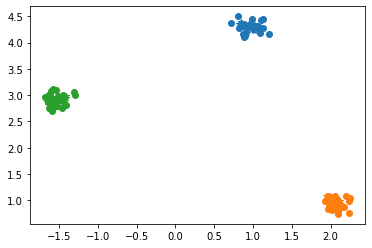

In [131]:
for i in range(3):
    mask = y_train == i
    plt.plot(X_train[mask,0], X_train[mask,1], 'o', color='C{}'.format(i))
    mask = y_test == i
    plt.plot(X_test[mask,0], X_test[mask,1], '*', color='C{}'.format(i))

In [132]:
s[0].predict(X_test) == (y_test == 0)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [133]:
s[1].predict(X_test) == (y_test == 1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [134]:
s[2].predict(X_test) == (y_test == 2)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## DD-SIMCA

There are many variants of SIMCA with drawbacks, caveats, and errors.  A recent [Ph.D. thesis from UCL](simca.pdf) discusses these and offers a number of improvements.

A variant known as "Data-driven" SIMCA is a little more advanced, and is presented in [Pomerantsev et al. (2014).](https://onlinelibrary.wiley.com/doi/abs/10.1002/cem.2506).

Backing up a bit, as described in ["Chemometric tools for food fraud detection: The role of target class in non-targeted analysis," Rodionova & Pomerantsev, Food Chemistry (2020)](https://www.sciencedirect.com/science/article/pii/S0308814620303101):
In addition to OD (orthogonal distance) there is also a SD (score distance) which can be computed.  
 * OD is the (squared) Euclidean distance between a sample and the scores subspace ($E = X - TP^T$, i.e., the "error").  We can write $q_i = \sum_j e_{i,j}^2$ for a given point $i$; clearly, $q_i$ is a sum of squares, and if we assume they are random, normal variates one can assume they follow a chi-squared distribution just as we did in PLS-DA.  
 * SD is the squared Mahalanobis distance from the model center to sample i within the subspace, computed as: $h_i = \sum_{k=1}^K \frac{t_{i,k}^2}{\lambda_k}$, where $t_i$ is a row from the scores matrix, and $\lambda_k = \sum_i t_{i,k}^2$ is the eigenvalue associated with dimension k (where K < J).  Again, we have a sum of squares.
 
It was been shown by [Pomerantsev](https://onlinelibrary.wiley.com/doi/pdf/10.1002/cem.1147?casa_token=0NaS1t1S6mYAAAAA:VHFiiSku72EY2KXifPJtZhwXlX8PhwGPDPKUN5LvBnhB2sSTe315Uc7vlX7GmuIlgPJTNIr8chd8JA) that both the SD and OD can be well approximated by a scaled chi-squared distribution.
 * It is possible to actually use a combination of OD and SD in a continuous way (like the way elastic net combines L1 and L2 penalties) to do classification, which also appears in the literature.  See ["Class-modelling in food analytical chemistry: Development, sampling, optimisation and validation issues – A tutorial," Oliveri Analytical Chimica Acta 982 (2017)](https://www.sciencedirect.com/science/article/pii/S0003267017306050) and the article by Vanden Branden at al. referenced previously. The [Ph.D. thesis from UCL](simca.pdf) also contains good references for this.
 * Pomerantsev discusses advantages and disadvantages of 5 different metrics involving SD and OD.  Figure 2 from this paper is shown below (due to a change of notation q is given as v). **They conclude 2 is the best and this what I have implemented here.**

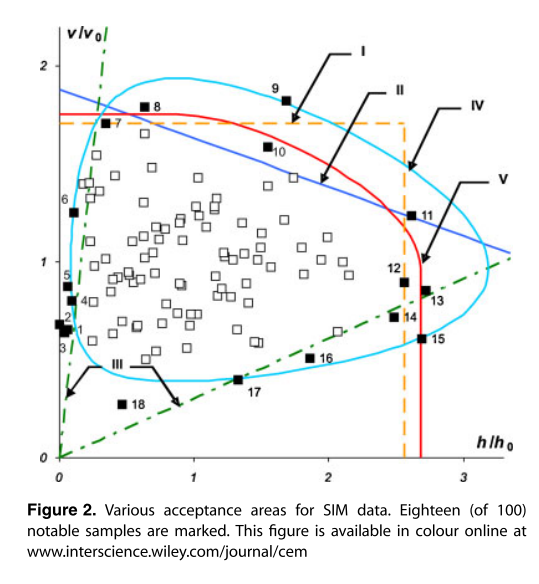

In [507]:
Image(filename='fig2_pomerantsev_2008.png', width=500) # Figure from P&R paper above

In DD-SIMCA, OD and SD are similarly combined to obtain a total distance of 
$$
c = N_h \frac{h}{h_0} + N_q \frac{q}{q_0} \sim \chi^2(N_h+N_q)
$$

where $h_0$ and $q_0$ are scaling factors and $N_h$ and $N_q$ are the degrees of freedom. This approach had been taken previously - the innovation is the "data-driven" aspect; this terminology arises from the fact that these parameters can be estimated from the training set rather than fixed to a certain value based on the size of the set.  The final decision rule for a class is $c < c_{\rm crit}$ with $c_{\rm crit} = \chi^{-2}(1-\alpha, N_h+N_q)$. (there appears to be a typo in Pomerantsev (2008) Eq. 27)

Ultimately, assumptions about the normality of the data in one way or another end up being required to use a theory driven method to derive acceptance boundaries.  The argument that Pomerantsev makes is that this is never known, or is at best dubious, so it is better to estimate things like the DoF from a data-driven approach.  Note that in the [Ph.D. thesis from UCL](simca.pdf) they also discuss a "learned distance to subspace" which bears some philosophical similarities.

Also refer to [this paper](1-s2.0-S0169743917301466-main.pdf) which publishes a MatLab GUI for DD-SIMCA as a comparison tool.

In [493]:
import scipy
class DD_SIMCA:
    def __init__(self, n_components, alpha=0.05):
        self.__n_components = n_components
        self.__alpha = alpha
        
    def fit(self, X_train):
        # 1. Standardize X
        self.__ss = StandardScaler(with_mean=True, with_std=True)
        self.__X_train = X_train.copy()
        
        # 2. Perform PCA on standardized coordinates
        self.__pca = PCA(n_components=self.__n_components, random_state=0)
        self.__pca.fit(self.__ss.fit_transform(self.__X_train))
        
        # 3. Compute critical distance
        self.__J = X_train.shape[1]
        
        h_vals, q_vals = self.h_q(self.__X_train)
        self.__h0, self.__q0 = np.mean(h_vals), np.mean(q_vals)
        self.__Nh, self.__Nq = self.estimate_dof(h_vals, q_vals)
        
        self.__c_crit = scipy.stats.chi2.ppf(1.0 - self.__alpha, self.__Nh + self.__Nq)
        
    def h_q(self, X_raw):
        X_raw_std = self.__ss.transform(X_raw)
        T = self.__pca.transform(X_raw_std)
        X_pred = np.matmul(T, self.__pca.components_)
        
        # OD
        q_vals = np.sum((X_raw_std - X_pred)**2, axis=1)
        
        # SD
        h_vals = np.sum(T**2/self.__pca.explained_variance_, axis=1) / (self.__X_train.shape[0]-1)
        
        return h_vals, q_vals
        
        
    def distance(self, X):
        h, q = self.h_q(X)
        
        return self.__Nh*h/self.__h0 + self.__Nq*q/self.__q0
        
    def estimate_dof(self, h_vals, q_vals):
        # Use "robust" method for estimating DoF
        def err2(N, vals):
            x0 = np.mean(vals) 
            a = (scipy.stats.chi2.ppf(0.75, N) - scipy.stats.chi2.ppf(0.25, N))/N
            b = scipy.stats.iqr(vals, rng=(25,75))/x0
            
            return((a-b)**2)

        # As in conclusions, Nh ~ n_components is expected
        res = scipy.optimize.minimize(err2, self.__n_components, args=(h_vals), method='Nelder-Mead')
        if res.success:
            Nh = res.x[0]
        else:
            raise Exception('Could not compute N_h : {}'.format(res.message))

        # As in conclusions, Nq ~ rank(X)-n_components is expected; 
        # assuming near full rank then this is min(I,J)-n_components (n_components<=J)
        res = scipy.optimize.minimize(err2, 
                                      np.min([len(q_vals),self.__J])-self.__n_components, 
                                      args=(q_vals), method='Nelder-Mead')
        if res.success:
            Nq = res.x[0]
        else:
            raise Exception('Could not compute N_q : {}'.format(res.message))

        return Nh, Nq
        
    def predict(self, X):
        # Check that observations are rows of X
        X = np.array(X)
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        assert(X.shape[1] == self.__J)

        # If c < c_crit, it belongs to the class
        return self.distance(X) < self.__c_crit

In [495]:
s = {}
for i in range(3):
    s[i] = DD_SIMCA(n_components=1, alpha=0.05)
    s[i].fit(X_train[y_train == i])

In [496]:
s[0].predict(X_test)

array([ True,  True, False,  True, False,  True,  True,  True, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False])

In [497]:
y_test == 0

array([ True,  True, False,  True, False,  True,  True,  True, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False])

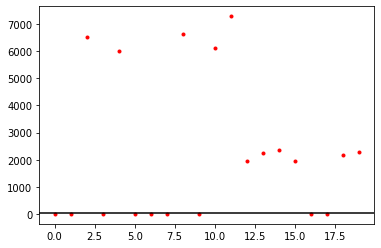

In [506]:
plt.plot(s[0].distance(X_test), '.', color='r')
plt.axhline(s[0]._DD_SIMCA__c_crit, color='k')

## LDA + SIMCA

Several drawbacks of SIMCA are discussed in this [Ph.D. thesis from UCL](simca.pdf).  One of the biggest is:
> "Since the PC class subspaces are built independently in SIMCA, the discriminative between-class information is neglected during this process. Therefore the classification rule calculated independently for each class may not be discriminative enough to classify a new sample."

Once again, we are using PCA to do this projection, but as we saw in the case of PLS and LDA the eigenvectors of cov(X) are not necessarily the best directions for discriminating classes from each other.  LDA aims directly at this, for example.  In the thesis a number of other, presumably more advanced subspace methods, are also investigated for their ability to create discriminitive subspaces.  In the thesis LDA is incorporated in an apparently non-obvious way, refer to the manuscript for details.  While they conclude that their "DOS" method is superior, standard SIMCA and LDA preprocessed SIMCA perform essentially the same.

# Notes

Use cross validation to identify number of dimensions to project into, and other hyperparameters.
See [this here](../cross_validation/) for more details.